In [0]:
!pip install face_recognition

In [2]:
from google.colab import drive
drive.mount("/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [5]:
import glob
samples = glob.glob("/gdrive/My Drive/samples/*")
samples

['/gdrive/My Drive/samples/林俊傑.png',
 '/gdrive/My Drive/samples/周杰倫.jpg',
 '/gdrive/My Drive/samples/新垣結衣.jpg',
 '/gdrive/My Drive/samples/阿信.jpeg',
 '/gdrive/My Drive/samples/長澤雅美.jpg',
 '/gdrive/My Drive/samples/林志玲.jpg']

這是: 新垣結衣
降維: [-4.75601703e-02  1.21960774e-01  3.62391248e-02 -9.40970480e-02
 -1.12498283e-01  5.17608374e-02 -9.55722332e-02 -5.66098616e-02
  1.79827571e-01 -1.56738549e-01  2.51588523e-01 -3.57232615e-02
 -2.24173978e-01 -1.38658658e-02  5.62518835e-06  1.81462348e-01
 -1.98613971e-01 -1.82584286e-01 -2.57670879e-03  7.49369860e-02
  6.83430582e-02  6.31524548e-02 -3.06690149e-02  1.59119517e-02
 -1.46144032e-01 -3.70138526e-01 -1.23077139e-01 -1.72442496e-02
 -2.97188312e-02 -5.08769453e-02 -2.95773447e-02  1.78494789e-02
 -1.82868525e-01  2.46917903e-02  1.02610990e-01  1.52376428e-01
 -3.62420455e-02 -8.33890066e-02  1.26063466e-01  1.12093836e-02
 -3.24254245e-01  4.49310616e-02  1.01445809e-01  2.16728315e-01
  1.17215618e-01  4.22045514e-02 -3.02706175e-02 -1.62350148e-01
  8.61601830e-02 -1.57464698e-01  8.92478973e-02  1.92972317e-01
  7.81906843e-02  8.69301856e-02  4.85579967e-02 -1.41029716e-01
  1.44709647e-02  1.55537367e-01 -1.00884207e-01 -2.33339518e-02
  9.11082476

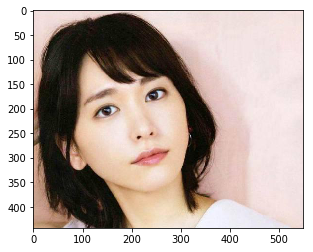

In [13]:
# Demo一個給你看
import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline
s = "/gdrive/My Drive/samples/新垣結衣.jpg"
img_np = face_recognition.load_image_file(s)
print("這是:", s.split("/")[-1].split(".")[0])
en = face_recognition.face_encodings(img_np)[0]
print("降維:", en)
plt.imshow(img_np)

In [18]:
import pandas as pd
labels = []
encodings = []
pictures = []
for s in samples:
    img_np = face_recognition.load_image_file(s)
    l = s.split("/")[-1].split(".")[0]
    en = face_recognition.face_encodings(img_np)[0]
    labels.append(l)
    encodings.append(list(en))
    pictures.append(list(img_np))
df = pd.DataFrame({
    "Name":labels,
    "Encoding":encodings,
    "Picture":pictures
})
df.to_csv("face.csv", encoding="utf-8", index=False)
df

,Name,Encoding,Picture
0,林俊傑,"[-0.015528827905654907, 0.0415678545832634, 0....","[[[165, 158, 165], [165, 158, 165], [165, 158,..."
1,周杰倫,"[-0.078513965010643, 0.15060093998908997, 0.05...","[[[59, 57, 71], [59, 57, 71], [59, 57, 71], [6..."
2,新垣結衣,"[-0.04756017029285431, 0.12196077406406403, 0....","[[[240, 216, 216], [242, 218, 218], [242, 218,..."
3,阿信,"[-0.06823480129241943, 0.06873072683811188, 0....","[[[31, 17, 4], [32, 18, 5], [34, 20, 7], [39, ..."
4,長澤雅美,"[-0.06494396924972534, 0.03374582529067993, 0....","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
5,林志玲,"[-0.04956519603729248, 0.02414611726999283, 0....","[[[246, 242, 239], [245, 241, 238], [246, 243,..."


In [0]:
from google.colab import files
files.download('face.csv')